In [1]:
pip install dataframe_image

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import dataframe_image as df


file_1 = "co-est2021-pop-13.csv"
file_2 = "co-est2020-alldata.csv"

file_1_df = pd.read_csv(file_1, delimiter=",", skiprows=3)

file_1_df.tail(10)
recent_census =file_1_df.drop(range(160,165))
recent_census


,Unnamed: 0,Unnamed: 1,2020,2021
0,Georgia,"10,711,908","10,725,800","10,799,566"
1,".Appling County, Georgia","18,444","18,428","18,488"
2,".Atkinson County, Georgia","8,286","8,301","8,391"
3,".Bacon County, Georgia","11,140","11,123","11,079"
4,".Baker County, Georgia","2,876","2,844","2,819"
...,...,...,...,...
155,".Whitfield County, Georgia","102,864","102,727","102,848"
156,".Wilcox County, Georgia","8,766","8,731","8,739"
157,".Wilkes County, Georgia","9,565","9,556","9,513"
158,".Wilkinson County, Georgia","8,877","8,844","8,831"


In [3]:
recent_census21 = recent_census['Unnamed: 0'].str.replace('.','')
county21 = recent_census21.str.split(',').str[0]

county21

C:\Users\yhuan\AppData\Local\Temp/ipykernel_10756/1531365318.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  recent_census21 = recent_census['Unnamed: 0'].str.replace('.','')


0               Georgia
1        Appling County
2       Atkinson County
3          Bacon County
4          Baker County
             ...       
155    Whitfield County
156       Wilcox County
157       Wilkes County
158    Wilkinson County
159        Worth County
Name: Unnamed: 0, Length: 160, dtype: object

In [4]:
# 2021 data
data21 = recent_census[['2020','2021']]

census_20 = pd.to_numeric(data21['2020'].str.replace(',',''), errors = 'coerce')

census_20

0      10725800
1         18428
2          8301
3         11123
4          2844
         ...   
155      102727
156        8731
157        9556
158        8844
159       20719
Name: 2020, Length: 160, dtype: int64

In [5]:
census_21 = pd.to_numeric(recent_census['2021'].str.replace(',',''), errors = 'coerce')

census_21

0      10799566
1         18488
2          8391
3         11079
4          2819
         ...   
155      102848
156        8739
157        9513
158        8831
159       20554
Name: 2021, Length: 160, dtype: int64

In [6]:
organized_21 = pd.DataFrame({"County":county21,"2020":census_20, "2021":census_21 })

census21_df= organized_21.set_index("County")

census21_df

,2020,2021
County,,
Georgia,10725800,10799566
Appling County,18428,18488
Atkinson County,8301,8391
Bacon County,11123,11079
Baker County,2844,2819
...,...,...
Whitfield County,102727,102848
Wilcox County,8731,8739
Wilkes County,9556,9513


In [7]:
file_2_df = pd.read_csv(file_2, delimiter=",", encoding="ISO-8859-1")

# file_2_df
file_2_ga = file_2_df[file_2_df['STNAME'] == 'Georgia']
file_2_ga.to_csv('cleanerCounties.csv')
file_2_ga

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019,RNETMIG2020
398,40,3,5,13,0,Georgia,Georgia,9687653,9688737,9712209,...,3.041427,3.798407,1.747055,4.060100,5.814395,7.200931,5.948622,5.638213,6.502924,4.765012
399,50,3,5,13,1,Georgia,Appling County,18236,18237,18337,...,3.098163,-9.988871,-4.843669,2.931914,-4.662637,-0.813824,-1.626457,4.109774,-8.340780,-2.941657
400,50,3,5,13,3,Georgia,Atkinson County,8375,8380,8363,...,-9.329028,-18.178535,-4.116970,-14.082797,7.737879,-11.188643,-7.009063,6.505632,-16.613495,8.402353
401,50,3,5,13,5,Georgia,Bacon County,11096,11097,11062,...,7.833603,-5.021971,0.089582,0.715820,1.071285,2.400747,-9.077964,-10.313901,-2.342976,-7.590133
402,50,3,5,13,7,Georgia,Baker County,3451,3447,3431,...,-38.267576,11.974255,-8.933889,-18.694407,-27.782065,-1.881763,-3.468390,-25.932448,-16.297262,-24.592888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,50,3,5,13,313,Georgia,Whitfield County,102599,102602,102740,...,-5.533701,-5.965944,-7.713370,-1.963739,-0.193555,1.134970,-7.072937,-4.851221,-1.439719,-7.111897
554,50,3,5,13,315,Georgia,Wilcox County,9255,9251,9313,...,-6.572922,-18.889556,1.324284,-14.569315,12.371823,-17.704073,-7.380493,4.213163,-21.390374,-8.299725
555,50,3,5,13,317,Georgia,Wilkes County,10593,10593,10389,...,-13.676706,-12.202923,-10.187775,4.424111,0.301705,-7.600709,9.859728,3.449500,-4.588559,-0.822073
556,50,3,5,13,319,Georgia,Wilkinson County,9563,9569,9528,...,-14.360382,7.303906,-11.569897,-8.581849,-19.495725,-3.425225,-5.674864,10.246130,-7.914832,-9.240478


In [8]:
ga_census_estimate_population = file_2_ga[["CTYNAME","POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017", "POPESTIMATE2018","POPESTIMATE2019"]]
ga_census_estimate_population = ga_census_estimate_population.rename(columns={"CTYNAME":"County","POPESTIMATE2010": "2010", "POPESTIMATE2011": "2011", "POPESTIMATE2012": "2012", "POPESTIMATE2013": "2013", "POPESTIMATE2014": "2014", "POPESTIMATE2015": "2015", "POPESTIMATE2016": "2016", "POPESTIMATE2017": "2017", "POPESTIMATE2018": "2018", "POPESTIMATE2019": "2019"})
ga_census_20 = ga_census_estimate_population.set_index("County")
ga_census_20

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
County,,,,,,,,,,
Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020
Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389
Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269
Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098
Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047
...,...,...,...,...,...,...,...,...,...,...
Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265
Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607
Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769


In [9]:
# merge_census = ga_census_20.merge(census21_df,how ='left', on ='CTYNAME')

merge_census_raw = census21_df.merge(ga_census_20,how ='right', on ='County')


column_names = ["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]

# column_names = ["2015","2016","2017","2018","2019","2020","2021"]

merge_census = merge_census_raw.reindex(columns=column_names)

merge_census

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,
Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020,10725800,10799566
Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389,18428,18488
Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269,8301,8391
Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098,11123,11079
Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047,2844,2819
...,...,...,...,...,...,...,...,...,...,...,...,...
Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265,102727,102848
Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607,8731,8739
Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769,9556,9513


In [10]:
year_merge = merge_census.keys()

year_merge

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021'],
      dtype='object')

In [11]:
# pick x numbers randomly
randomNumbers_merge = []
i = 0
while i < 10:
    
    num_merge = random.randint(1, 159)
    if num_merge not in randomNumbers_merge:
        randomNumbers_merge.append(num_merge)
#         print(randomNumbers2)
        i = i + 1

2010    9528
2011    9413
2012    9481
2013    9361
2014    9283
2015    9080
2016    9021
2017    8953
2018    9005
2019    8936
2020    8844
2021    8831
Name: Wilkinson County, dtype: int64
2010    21817
2011    21596
2012    21331
2013    21214
2014    21201
2015    21167
2016    21052
2017    21011
2018    21061
2019    21112
2020    20619
2021    20793
Name: Meriwether County, dtype: int64
2010    48388
2011    47841
2012    47819
2013    47727
2014    47553
2015    47491
2016    47287
2017    47362
2018    47293
2019    47567
2020    49497
2021    49547
Name: Laurens County, dtype: int64
2010    26133
2011    26301
2012    26336
2013    26585
2014    26637
2015    26683
2016    26880
2017    27153
2018    27523
2019    27677
2020    28046
2021    28712
Name: Monroe County, dtype: int64
2010    215226
2011    217769
2012    220690
2013    224372
2014    230239
2015    235424
2016    241929
2017    247944
2018    254277
2019    259475
2020    268043
2021    274615
Name: Cherokee C

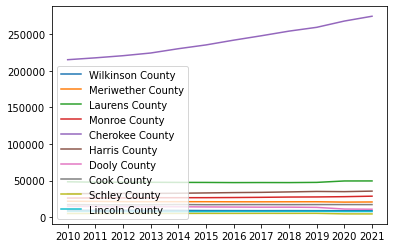

In [12]:
countyDataDictionary_merge = {}
county_names= []

for x in randomNumbers_merge:

    countyDataDictionary_merge[x] = merge_census.iloc[x]        

for x in countyDataDictionary_merge:
    print(countyDataDictionary_merge[x])
    
    county_names.append(countyDataDictionary_merge[x].name)
    plt.plot(year_merge, countyDataDictionary_merge[x])
    
# for col in df:
#     plt.plot(df.index, df[col])
# plt.legend(df.columns)
# plt.show()

county_df = pd.DataFrame({"data":countyDataDictionary_merge})

# print(county_df)

plt.legend(county_names,loc="lower left")
# plt.figure(figsize=(200,40))
# plt.yscale('log')
plt.show()

In [13]:
merge_census

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,
Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020,10725800,10799566
Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389,18428,18488
Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269,8301,8391
Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098,11123,11079
Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047,2844,2819
...,...,...,...,...,...,...,...,...,...,...,...,...
Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265,102727,102848
Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607,8731,8739
Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769,9556,9513


Glynn County
Newton County
Macon County
Fayette County
Montgomery County
Troup County
Bacon County
Elbert County
Clarke County
Early County


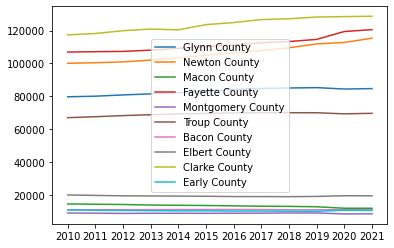

In [14]:
samples_df = merge_census.sample(10)

for row in samples_df.index:
    print(row)
    
    plt.plot(samples_df.loc[row,:])

plt.legend(samples_df.index)
plt.show()

In [15]:
samples_df.T

County,Glynn County,Newton County,Macon County,Fayette County,Montgomery County,Troup County,Bacon County,Elbert County,Clarke County,Early County
2010,79750,100128,14644,106938,9140,67060,11062,20101,117389,10983
2011,80123,100446,14452,107171,9027,67651,11150,19822,118229,10791
2012,80889,100965,14297,107343,8883,68324,11152,19577,119915,10641
2013,81533,102060,13973,108103,8954,68859,11174,19492,120927,10543
2014,82212,103470,13822,109259,8978,69341,11178,19391,120437,10451
2015,83368,104920,13689,110215,8939,69666,11225,19303,123621,10459
2016,84211,106529,13483,111294,8996,69990,11268,19122,124873,10310
2017,84836,107903,13255,112626,9032,70123,11204,19104,126674,10313
2018,85099,109556,13153,113333,9157,70091,11096,19053,127179,10255
2019,85326,111894,12934,114645,9148,70059,11098,19205,128238,10176


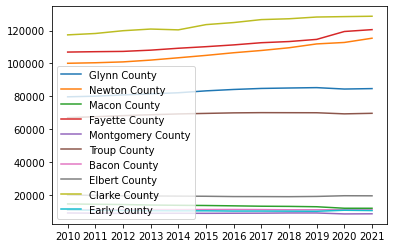

In [16]:
plt.plot(samples_df.T);
plt.legend(samples_df.index,loc="lower left")
plt.show()

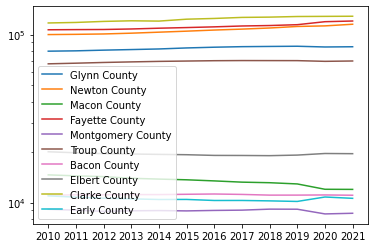

In [17]:
plt.plot(samples_df.T);
plt.legend(samples_df.index,loc="lower left")
plt.yscale('log')
plt.show()

In [18]:
#df.pct_change(axis='columns', periods=-1)
merge_pct_change = merge_census.pct_change(axis='columns', periods =1)
merge_pct_change

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,
Georgia,NaN,0.009413,0.010195,0.007271,0.009585,0.011136,0.012284,0.010534,0.009826,0.010327,0.009200,0.006877
Appling County,NaN,0.006653,-0.004171,-0.000816,0.005553,-0.002653,0.001249,0.000217,0.004933,-0.008038,0.002121,0.003256
Atkinson County,NaN,-0.000478,-0.012561,0.001090,-0.006293,0.014615,-0.004561,-0.004341,0.010537,-0.008988,0.003870,0.010842
Bacon County,NaN,0.007955,0.000179,0.001973,0.000358,0.004205,0.003831,-0.005680,-0.009639,0.000180,0.002253,-0.003956
Baker County,NaN,-0.034975,0.017819,-0.007122,-0.017633,-0.028902,-0.002193,-0.008477,-0.021849,-0.013597,-0.066623,-0.008790
...,...,...,...,...,...,...,...,...,...,...,...,...
Whitfield County,NaN,0.001645,0.000165,-0.002283,0.003389,0.005648,0.006688,-0.002186,0.000221,0.001498,-0.014751,0.001178
Wilcox County,NaN,-0.006979,-0.019356,-0.001654,-0.013806,0.009632,-0.020078,-0.006113,0.000456,-0.020150,0.014407,0.000916
Wilkes County,NaN,-0.015305,-0.013392,-0.016051,0.002920,-0.003313,-0.011988,0.006117,-0.002331,-0.007720,-0.021804,-0.004500


In [19]:
merge_dropped=merge_pct_change.drop(columns= ['2010'])

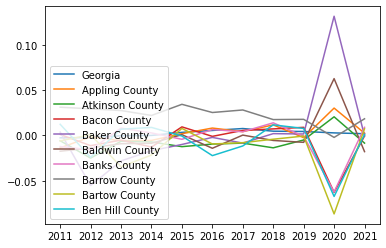

In [20]:
plt.plot(merge_dropped.sample(10).T);
plt.legend(merge_dropped.index,loc="lower left")
# plt.yscale('log')
# plt.figure(figsize=(200,40))
plt.show()

In [21]:
merge_census


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,
Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020,10725800,10799566
Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389,18428,18488
Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269,8301,8391
Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098,11123,11079
Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047,2844,2819
...,...,...,...,...,...,...,...,...,...,...,...,...
Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265,102727,102848
Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607,8731,8739
Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769,9556,9513


In [22]:
sample_counties = merge_census.sample(10)

sample_counties

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,
Thomas County,44744,44591,44535,44783,44784,44819,44967,44623,44336,44427,45766,45842
Clarke County,117389,118229,119915,120927,120437,123621,124873,126674,127179,128238,128489,128711
Hancock County,9433,9394,9078,8952,8571,8579,8644,8545,8344,8475,8722,8630
Rockdale County,85359,85423,85453,86522,87222,88424,88995,89800,90402,90639,93614,94082
Paulding County,142826,143606,144750,146775,148562,151691,155415,159642,164482,169302,169660,173780
Coffee County,42729,42998,43131,43084,42893,42998,42924,42871,43060,43278,43047,43386
Stephens County,26124,25763,25721,25571,25429,25475,25680,25785,26083,26017,26800,26865
Haralson County,28763,28474,28325,28357,28513,28733,28860,29286,29626,29884,29985,30572
Glynn County,79750,80123,80889,81533,82212,83368,84211,84836,85099,85326,84470,84739


In [41]:
sample_19= sample_counties['2019'].describe()
sample_20 = sample_counties['2020'].describe()
sample_20 = sample_counties['2020'].describe()
sample_stat = pd.DataFrame({'2019': sample_19, '2020': sample_20, '2021': sample_21})

sample_stat.dfi.export('plots_tables/sample_stat.png')

In [42]:
sample_20 = sample_counties['2020'].describe()

In [43]:
sample_21 = sample_counties['2021'].describe()

In [44]:
sample_stat = pd.DataFrame({'2019': sample_19, '2020': sample_20, '2021': sample_21})

In [54]:
sample_counties.dfi.export('plots_tables/sample_counties.png')

In [55]:
sample_stat.dfi.export('plots_tables/sample_stat.png')

In [46]:
samp_change = sample_counties.pct_change(axis= 'columns', periods =1)

clean_samp_change = samp_change.drop(columns= ['2010'])
clean_samp_change

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,
Thomas County,-0.003419,-0.001256,0.005569,0.000022,0.000782,0.003302,-0.007650,-0.006432,0.002053,0.030139,0.001661
Clarke County,0.007156,0.014260,0.008439,-0.004052,0.026437,0.010128,0.014423,0.003987,0.008327,0.001957,0.001728
Hancock County,-0.004134,-0.033638,-0.013880,-0.042560,0.000933,0.007577,-0.011453,-0.023523,0.015700,0.029145,-0.010548
Rockdale County,0.000750,0.000351,0.012510,0.008090,0.013781,0.006458,0.009045,0.006704,0.002622,0.032823,0.004999
Paulding County,0.005461,0.007966,0.013990,0.012175,0.021062,0.024550,0.027198,0.030318,0.029304,0.002115,0.024284
Coffee County,0.006295,0.003093,-0.001090,-0.004433,0.002448,-0.001721,-0.001235,0.004409,0.005063,-0.005338,0.007875
Stephens County,-0.013819,-0.001630,-0.005832,-0.005553,0.001809,0.008047,0.004089,0.011557,-0.002530,0.030096,0.002425
Haralson County,-0.010048,-0.005233,0.001130,0.005501,0.007716,0.004420,0.014761,0.011610,0.008709,0.003380,0.019576
Glynn County,0.004677,0.009560,0.007962,0.008328,0.014061,0.010112,0.007422,0.003100,0.002667,-0.010032,0.003185


In [47]:
samp_change = sample_counties.pct_change(axis= 'columns', periods =1)

clean_samp_change = samp_change.drop(columns= ['2010'])

per_samp_change= clean_samp_change*100

per_samp_change

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,
Thomas County,-0.341945,-0.125586,0.556865,0.002233,0.078153,0.330217,-0.765005,-0.643166,0.205251,3.013933,0.166062
Clarke County,0.715570,1.426046,0.843931,-0.405203,2.643706,1.012773,1.442265,0.398661,0.832685,0.195730,0.172777
Hancock County,-0.413442,-3.363849,-1.387971,-4.256032,0.093338,0.757664,-1.145303,-2.352253,1.569990,2.914454,-1.054804
Rockdale County,0.074977,0.035119,1.250980,0.809043,1.378093,0.645752,0.904545,0.670379,0.262162,3.282252,0.499925
Paulding County,0.546119,0.796624,1.398964,1.217510,2.106191,2.454991,2.719815,3.031784,2.930412,0.211456,2.428386
Coffee County,0.629549,0.309317,-0.108970,-0.443320,0.244795,-0.172101,-0.123474,0.440857,0.506270,-0.533758,0.787511
Stephens County,-1.381871,-0.163024,-0.583181,-0.555317,0.180896,0.804711,0.408879,1.155711,-0.253038,3.009571,0.242537
Haralson County,-1.004763,-0.523284,0.112974,0.550129,0.771578,0.442000,1.476091,1.160964,0.870857,0.337973,1.957645
Glynn County,0.467712,0.956030,0.796153,0.832792,1.406121,1.011179,0.742183,0.310010,0.266748,-1.003211,0.318456


In [48]:
per_samp_19= per_samp_change['2019'].describe()
per_samp_20= per_samp_change['2020'].describe()
per_samp_21= per_samp_change['2021'].describe()

per_samp_stat = pd.DataFrame({'2019': per_samp_19, '2020': per_samp_20, '2021': per_samp_19})

per_samp_stat


In [49]:
per_samp_20= per_samp_change['2020'].describe()

In [50]:
per_samp_19= per_samp_change['2020'].describe()

In [53]:
per_samp_stat = pd.DataFrame({'2019': per_samp_19, '2020': per_samp_20, '2021': per_samp_19})

per_samp_stat

,2019,2020,2021
count,10.000000,10.000000,10.000000
mean,1.526041,1.526041,1.526041
std,1.834648,1.834648,1.834648
min,-1.003211,-1.003211,-1.003211
25%,0.199661,0.199661,0.199661
50%,1.626214,1.626214,1.626214
75%,3.012842,3.012842,3.012842
max,3.832009,3.832009,3.832009


In [56]:
per_samp_change.dfi.export('plots_tables/per_samp_change.png')

In [57]:
per_samp_stat.dfi.export('plots_tables/per_samp_stat.png')

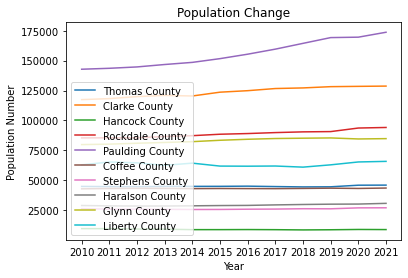

In [28]:
plt.plot(sample_counties.T);
plt.legend(sample_counties.index,loc="lower left")

#labeling
plt.title("Population Change")
plt.xlabel("Year")
plt.ylabel("Population Number")

plt.savefig('plots_tables/sample_counties_plot.png')
plt.show()

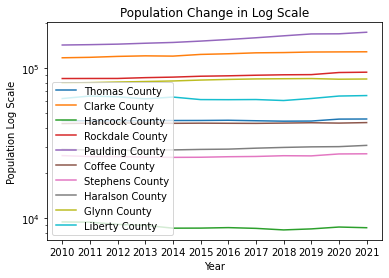

In [29]:
plt.plot(sample_counties.T);
plt.legend(sample_counties.index,loc="lower left")

#labeling
plt.title("Population Change in Log Scale")
plt.xlabel("Year")
plt.ylabel("Population Log Scale")
#set log scale
plt.yscale('log')

#save figure
plt.savefig('plots_tables/sample_counties_plot_logscale.png')

plt.show()


KeyError: 'Fulton County'

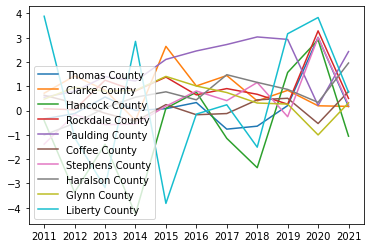

In [30]:
plt.plot(per_samp_change.T);
plt.legend(per_samp_change.index,loc="lower left")
print(per_samp_change.T['Fulton County'])
#labeling
plt.title("Population % Change")
plt.xlabel("Year")
plt.ylabel("% change")
plt.savefig('plots_tables/per_samp_change_plot.png')
plt.show()

In [ ]:
plt.plot(sample_counties.T['Fulton County'], label='Fulton County' );
plt.plot(sample_counties.T['Chatham County'], label='Chatham County' );
plt.legend(loc="best")
plt.yscale('log')

#labeling 
plt.title("Fulton vs Chatham")
plt.xlabel("Year")
plt.ylabel("Population")

plt.savefig('plots_tables/fulton_chatham_plot.png')
plt.show()

In [ ]:
plt.plot(per_samp_change.T['Fulton County'], label='Fulton County');
plt.plot(per_samp_change.T['Chatham County'], label='Chatham County');
plt.legend(loc="lower left")

#labeling 
plt.title("Fulton vs Chatham % Change")
plt.xlabel("Year")
plt.ylabel("% Change")

plt.savefig('plots_tables/fulton_chatham_change_plot.png')
plt.show()

In [ ]:
plt.plot(sample_counties.T['Barrow County'], label='Barrow County' );
plt.plot(sample_counties.T['Worth County'], label='Worth County' );
plt.legend(loc="best")

#labeling 
plt.title("Barrow vs Worth")
plt.xlabel("Year")
plt.ylabel("Population")

plt.savefig('plots_tables/barrow_worth_plot.png')
plt.show()

In [ ]:
plt.plot(per_samp_change.T['Barrow County'], label='Barrow County');
plt.plot(per_samp_change.T['Worth County'], label='Worth County');
plt.legend(loc="best")

#labeling 
plt.title("Barrow vs Worth % Change")
plt.xlabel("Year")
plt.ylabel("% Change")

plt.savefig('plots_tables/barrow_worth_change_plot.png')
plt.show()

In [ ]:
plt.plot(sample_counties.T['Grady County'], label='Grady County' );
plt.plot(sample_counties.T['Pike County'], label='PIke County' );
plt.legend(loc="best")

#labeling 
plt.title("Grady vs Pike")
plt.xlabel("Year")
plt.ylabel("Population")

plt.savefig('plots_tables/grady_pike_plot.png')
plt.show()

In [ ]:
plt.plot(per_samp_change.T['Grady County'], label='Grady County');
plt.plot(per_samp_change.T['Pike County'], label='Pike County');
plt.legend(loc="best")
#labeling 
plt.title("Grady vs Pike % Change")
plt.xlabel("Year")
plt.ylabel("% Change")

plt.savefig('plots_tables/grady_pike_change_plot.png')
plt.show()

In [ ]:
from scipy.stats import linregress

In [ ]:
fulton_years = sample_counties.T['Fulton County'].index.astype(float)
fulton_pop = sample_counties.T['Fulton County']

In [ ]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(fulton_years,fulton_pop)
regress_values = fulton_years * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(fulton_years, fulton_pop, edgecolor = "black")

# draw our regression line
plt.plot(grady_years,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2010,1060000),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2010,1030000), fontsize = 15, color = "red")
#labeling 
plt.title("Population Change for Fulton")
plt.xlabel("year")
plt.ylabel("Population")
plt.savefig('plots_tables/fulton_pop_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [ ]:
fulton_per = per_samp_change.T['Fulton County']
fulton_per_year = per_samp_change.T['Fulton County'].index.astype(float)

In [ ]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(fulton_per_year,fulton_per)
regress_values = fulton_per_year * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(fulton_per_year, fulton_per, edgecolor = "black")

# draw our regression line
plt.plot(fulton_per_year,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2011,0.5),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2011,0), fontsize = 15, color = "red")
#labeling 
plt.title("% Change for Fulton")
plt.xlabel("year")
plt.ylabel("% change")
plt.savefig('plots_tables/fulton_pop_per_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [ ]:
chatham_years = sample_counties.T['Chatham County'].index.astype(float)
chatham_pop = sample_counties.T['Chatham County']

In [ ]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(chatham_years,chatham_pop)
regress_values = chatham_years * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(chatham_years, chatham_pop, edgecolor = "black")

# draw our regression line
plt.plot(chatham_years,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2013,275000),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2014,270000), fontsize = 15, color = "red")
#labeling 
plt.title("Population Change for Chatham")
plt.xlabel("year")
plt.ylabel("Population")
plt.savefig('plots_tables/chatham_pop_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [ ]:
chatham_per = per_samp_change.T['Chatham County']
chatham_per_year = per_samp_change.T['Chatham County'].index.astype(float)

In [ ]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(chatham_per_year,chatham_per)
regress_values = chatham_per_year * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(chatham_per_year, chatham_per, edgecolor = "black")

# draw our regression line
plt.plot(chatham_per_year,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2011,0.25),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2011,0), fontsize = 15, color = "red")
#labeling 
plt.title("% Change for Chatham")
plt.xlabel("year")
plt.ylabel("% change")
plt.savefig('plots_tables/chatham_pop_per_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [ ]:
grady_years = sample_counties.T['Grady County'].index.astype(float)
grady_pop = sample_counties.T['Grady County']

In [ ]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(grady_years,grady_pop)
regress_values = grady_years * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(grady_years, grady_pop, edgecolor = "black")

# draw our regression line
plt.plot(grady_years,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2010,26000),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2010,25800), fontsize = 15, color = "red")
#labeling 
plt.title("Population Change for Grady")
plt.xlabel("year")
plt.ylabel("Population")
plt.savefig('plots_tables/grady_pop_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [ ]:
grady_per = per_samp_change.T['Grady County']
grady_per_year = per_samp_change.T['Grady County'].index.astype(float)

In [ ]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(grady_per_year,grady_per)
regress_values = grady_per_year * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(grady_per_year, grady_per, edgecolor = "black")

# draw our regression line
plt.plot(grady_per_year,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2014,3.25),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2014,2), fontsize = 15, color = "red")
#labeling 
plt.title("% Change for Grady")
plt.xlabel("year")
plt.ylabel("% change")
plt.savefig('plots_tables/grady_pop_per_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [ ]:
worth_years = sample_counties.T['Worth County'].index.astype(float)
worth_pop = sample_counties.T['Worth County']

In [ ]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(worth_years,worth_pop)
regress_values = worth_years * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(worth_years, worth_pop, edgecolor = "black")

# draw our regression line
plt.plot(worth_years,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2014,21400),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2014,21200), fontsize = 15, color = "red")
#labeling 
plt.title("Population Change for Worth")
plt.xlabel("year")
plt.ylabel("Population")
plt.savefig('plots_tables/worth_pop_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [ ]:
worth_per = per_samp_change.T['Worth County']
worth_per_year = per_samp_change.T['Worth County'].index.astype(float)

In [ ]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(worth_per_year,worth_per)
regress_values = worth_per_year * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(worth_per_year, worth_per, edgecolor = "black")

# draw our regression line
plt.plot(worth_per_year,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2011,1.5),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2011,1), fontsize = 15, color = "red")
#labeling 
plt.title("% Change for Worth")
plt.xlabel("year")
plt.ylabel("% change")
plt.savefig('plots_tables/worth_pop_per_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show